# Part 1: Small World Networks


## Exercise 1: Chapter 3, Sections 3.5-3.10

_See personal notes in Obsidian_


## Exercise 2: The Watts-Strogatz (WS) Model


Shortest path of graph p=0: 37.88
Shortest path of graph p=0.1: 7.31
Shortest path of graph p=1: 4.36


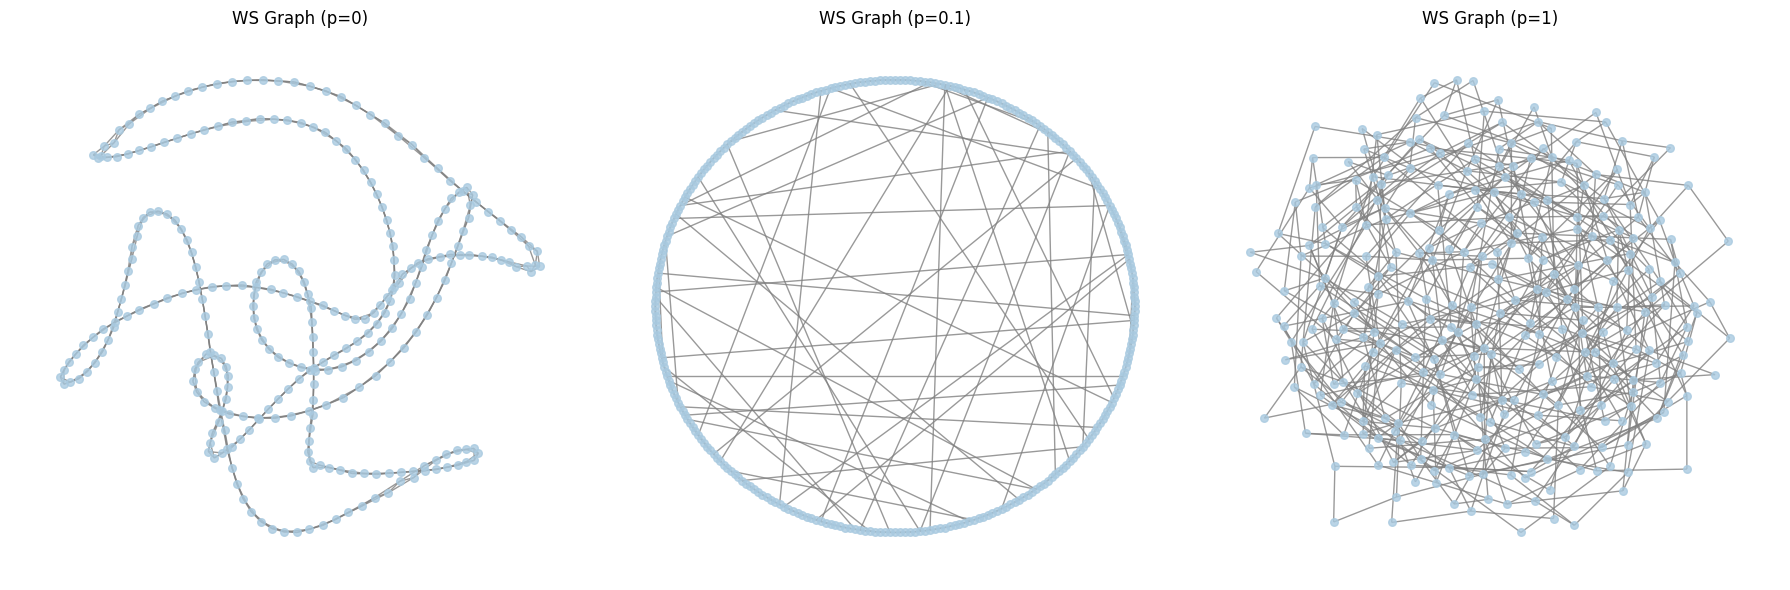

p=0.00 avg_shortest_path=37.8763
p=0.01 avg_shortest_path=16.1446
p=0.02 avg_shortest_path=12.7520
p=0.03 avg_shortest_path=10.5893
p=0.04 avg_shortest_path=9.3081
p=0.05 avg_shortest_path=8.7290
p=0.06 avg_shortest_path=8.9309
p=0.07 avg_shortest_path=8.0309
p=0.08 avg_shortest_path=7.2237
p=0.09 avg_shortest_path=7.4133
p=0.10 avg_shortest_path=7.2299
p=0.11 avg_shortest_path=6.5903
p=0.12 avg_shortest_path=6.4554
p=0.13 avg_shortest_path=6.0077
p=0.14 avg_shortest_path=6.0493
p=0.15 avg_shortest_path=6.0302
p=0.16 avg_shortest_path=5.7830
p=0.17 avg_shortest_path=5.7704
p=0.18 avg_shortest_path=5.6163
p=0.19 avg_shortest_path=5.5073
p=0.20 avg_shortest_path=5.6249
p=0.21 avg_shortest_path=5.4083
p=0.22 avg_shortest_path=5.6645
p=0.23 avg_shortest_path=5.3442
p=0.24 avg_shortest_path=5.4439
p=0.25 avg_shortest_path=5.3921
p=0.26 avg_shortest_path=5.1749
p=0.27 avg_shortest_path=5.0875
p=0.28 avg_shortest_path=5.0161
p=0.29 avg_shortest_path=5.0527
p=0.30 avg_shortest_path=5.0840
p=0.

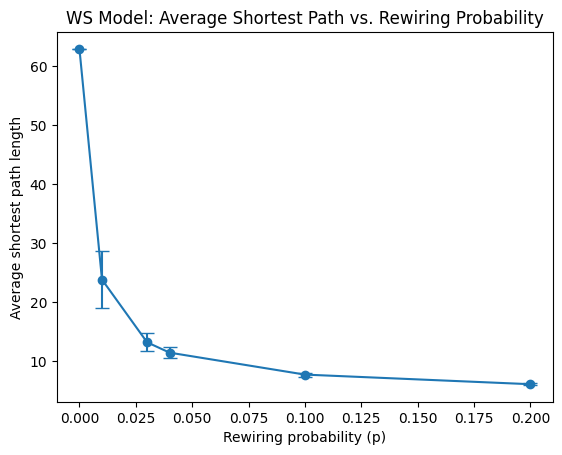

In [4]:
import networkx as nx
import numpy as np
from matplotlib import pyplot

# Network properties
N = 300
k = 4
p_values = [0, 0.1, 1]

# Exercise 1.1

# Create WS graphs for different p values
WS_graphs = {}
for p in p_values:
    WS_graphs[p] = nx.watts_strogatz_graph(N, k, p)

# Calculates shortest path of the 3 graphs
for g in WS_graphs:
    # print(
    #     "Shortest path of graph with p=",
    #     format(g),
    #     ": {:.2f}".format(nx.average_shortest_path_length(WS_graphs[g])),
    #     sep="",
    # )
    print(
        f"Shortest path of graph p={g}: {nx.average_shortest_path_length(WS_graphs[g]):.2f}"
    )
pyplot.figure(figsize=(18, 6))
layouts = [nx.spring_layout, nx.circular_layout, nx.kamada_kawai_layout]
titles = [f"WS Graph (p={p})" for p in p_values]

for i, p in enumerate(p_values):
    pyplot.subplot(1, 3, i + 1)
    pos = (
        layouts[i](WS_graphs[p], seed=42)
        if layouts[i] == nx.spring_layout
        else layouts[i](WS_graphs[p])
    )
    nx.draw(
        WS_graphs[p],
        pos,
        node_size=30,
        node_color="#a9cae0",
        edge_color="gray",
        with_labels=False,
        alpha=0.8,
    )
    pyplot.title(titles[i])
    pyplot.axis("off")

pyplot.tight_layout()
pyplot.show()

# Exercise 1.3

# Extended sweep over p values

dense_p_values = [i / 100 for i in range(0, 101)]  # 0.00 ... 1.00
ws_path_lengths = {}

for p in dense_p_values:
    G_tmp = nx.watts_strogatz_graph(N, k, p)
    ws_path_lengths[p] = nx.average_shortest_path_length(G_tmp)

for p in dense_p_values:
    print(f"p={p:.2f} avg_shortest_path={ws_path_lengths[p]:.4f}")

# Exercsie 1.4

print()

# Network properties
N_2 = 500
k_2 = 4
p_2_values = [0, 0.01, 0.03, 0.04, 0.1, 0.2]

WS_graphs_2 = {}

# Generate 50 graphs for each of the p-values
for p in p_2_values:
    WS_graphs_2[p] = [nx.watts_strogatz_graph(N_2, k_2, p) for _ in range(50)]

avg_distances = []
std_devs = []

# Calculate average shortest path and standard deviation for each graph
for p in p_2_values:
    avg_paths = [nx.average_shortest_path_length(_) for _ in WS_graphs_2[p]]
    # print(avg_paths)
    avg_path = sum(avg_paths) / len(avg_paths)
    avg_distances.append(np.mean(avg_paths))
    std_dev = np.std(avg_paths)
    std_devs.append(np.std(avg_paths))
    print(f"Average distance of graph p={p}: {avg_path:.2f}")
    print(f"Standard deviation of shortest path for p={p}: {std_dev:.2f}")

# Plotting distances
pyplot.errorbar(p_2_values, avg_distances, yerr=std_devs, fmt="o-", capsize=5)
pyplot.xlabel("Rewiring probability (p)")
pyplot.ylabel("Average shortest path length")
pyplot.title("WS Model: Average Shortest Path vs. Rewiring Probability")
pyplot.show()

# Part 2: Scale-Free Networks


## Exercise 1: The Barabasi-Albert (BA) Model


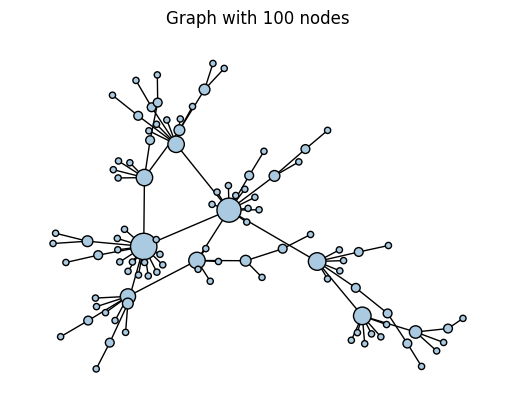

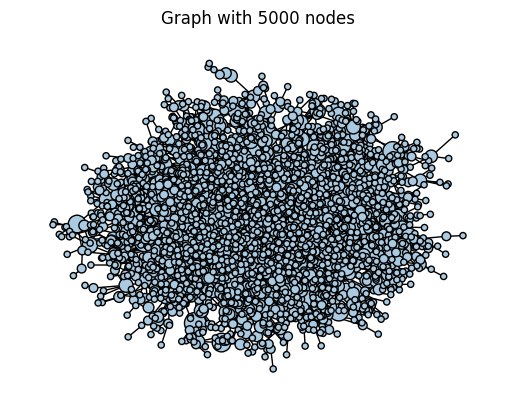

Min degree: 1
Max degree: 129


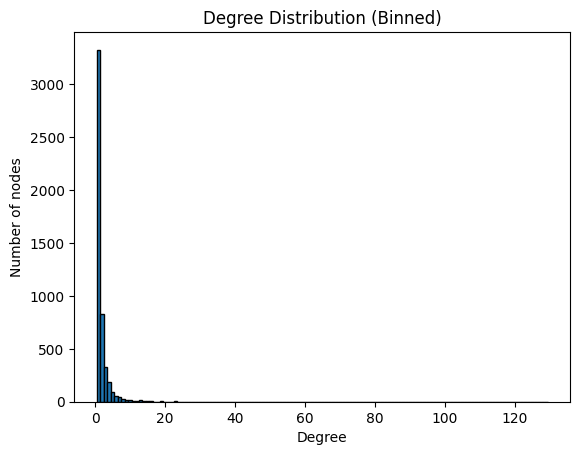

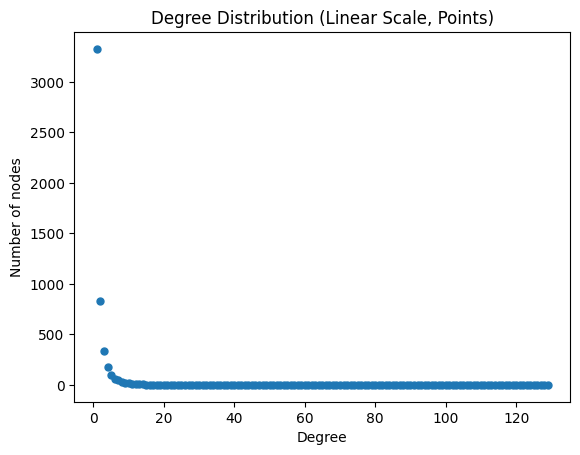

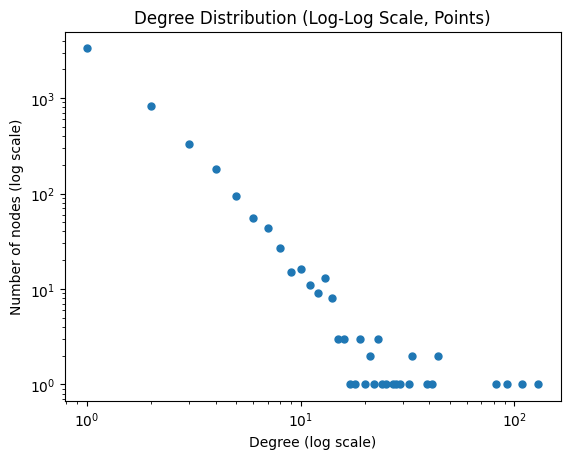

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Barabasi-Albert graph
BA = nx.Graph()

BA.add_edges_from([(1, 2)])

# Collected degrees (dictionary)
degrees = dict(BA.degree())
node_sizes = []

# print(BA)
# print(degrees)


def preferential_attachment():
    global degrees
    global node_sizes

    # Get total degree sum
    total_degree = sum(degrees.values())

    # Calculate connection probabilities
    probabilities = [degrees[node] / total_degree for node in BA.nodes()]

    # Node chosen based on preferential attachment
    chosen_node = np.random.choice(list(BA.nodes()), p=probabilities)

    # Add and connect new node to chosen node
    new_node = max(BA.nodes()) + 1
    BA.add_edge(new_node, chosen_node)

    # Update degrees dictionary
    degrees = dict(BA.degree())
    node_sizes = [degrees[node] * 20 for node in BA.nodes()]

    return node_sizes


# 100 node network
for i in range(98):
    preferential_attachment()

# Info about graph and its degrees
# print(BA)
# print(degrees)

# Plotting 100 node graph
plt.figure()
plt.title("Graph with 100 nodes")
nx.draw(BA, node_size=node_sizes, node_color="#a9cae0", edgecolors="black")
plt.show()
# Image("ba-model-100-nodes.png")

# 5000 node network
for i in range(4900):
    preferential_attachment()

# Info about graph and its degrees
# print(BA)
# print(degrees)

# Plotting 5000 node graph
plt.figure()
plt.title("Graph with 5000 nodes")
nx.draw(BA, node_size=node_sizes, node_color="#a9cae0", edgecolors="black")
plt.show()
# Image("ba-model-100-nodes.png")

print("Min degree:", min(degrees.values()))
print("Max degree:", max(degrees.values()))

# Bin degree distribution with np.histogram
degree_values = list(degrees.values())
bins = (
    np.arange(min(degree_values), max(degree_values) + 2) - 0.5
)  # bin edges for integer degrees
hist, bin_edges = np.histogram(degree_values, bins=bins)

# Plot degree distribution
plt.figure()
plt.bar(bin_edges[:-1] + 0.5, hist, width=1, edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Binned)")
plt.show()

# Plot degree distribution: linear axes (points)
plt.figure()
plt.plot(bin_edges[:-1] + 0.5, hist, "o", markersize=5)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Linear Scale, Points)")
plt.show()

# Plot degree distribution: log-log axes (points)
plt.figure()
plt.plot(bin_edges[:-1] + 0.5, hist, "o", markersize=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log scale)")
plt.ylabel("Number of nodes (log scale)")
plt.title("Degree Distribution (Log-Log Scale, Points)")
plt.show()

# Part 3: The Friendship Paradox in Scale-Free Networks


## Exercise 1: The Friendship Paradox in BA Networks

In [118]:
from random import choice

# Friendship BA
F_BA = BA

# Random node and degree
rand_node = int(np.random.choice(F_BA))
# print("Randomly chosen node:", rand_node)

rand_degree = F_BA.degree[rand_node]
# print("Degree of random node:", rand_degree)

# Random node neighbors
rand_neighbors = [n for n in F_BA.neighbors(rand_node)]
# print(f"Degree of random node {rand_node}:", rand_neighbors)


# Neighbor degrees and average neighbor degree
def avg_neighbor_degree(rand_node):
    neighbor_count = 0
    degree_sum = 0
    for n in F_BA.neighbors(rand_node):
        neighbor_count = neighbor_count + 1
        degree_sum = degree_sum + F_BA.degree(n)
        # print(f"Neighbor: {n}, Degree: {F_BA.degree(n)}")
    # print("Neighbor count:", neighbor_count)
    return int(degree_sum / neighbor_count)


# print("Average neighbor degree:", avg_neighbor_degree(rand_node))

above = 0
for n in range(1000):
    random_node = int(np.random.choice(F_BA))
    if avg_neighbor_degree(random_node) > F_BA.degree[random_node]:
        above = above + 1

print(f"Friend paradox {above} out of 1000. In percent: {above/1000 * 100:.2f}%")

Friend paradox 800 out of 1000. In percent: 80.00%


## Exercise 2: The Friendship Paradox in General